### Этот блокнот содержит аналитику результатов экспериментов с Optuna

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
results = pd.read_csv('optuna_results (2).csv')
params = pd.read_csv('optuna_best_trials.csv')

In [ ]:
results["metric_name"] = results["checkpoint"].str.extract(r"model_(.*?)_optuna_trial")

In [ ]:
results

,batch_size,learning_rate,split_count,cnt_min,cnt_max,embedding_dim,category_embedding_dim,checkpoint,epoch_num,accuracy,...,metric_ripser,time_rankme,time_coherence,time_pseudo_condition_number,time_alpha_req,time_stable_rank,time_ne_sum,time_self_clustering,time_ripser,metric_name
0,32,0.002283,2,20,50,16,16,checkpoints/model_rankme_optuna_trial_0_epoch=...,0,0.594159,...,NaN,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rankme
1,32,0.002283,2,20,50,16,16,checkpoints/model_rankme_optuna_trial_0_epoch=...,1,0.632427,...,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rankme
2,32,0.002283,2,20,50,16,16,checkpoints/model_rankme_optuna_trial_0_epoch=...,2,0.644512,...,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rankme
3,32,0.002283,2,20,50,16,16,checkpoints/model_rankme_optuna_trial_0_epoch=...,3,0.648540,...,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rankme
4,32,0.002283,2,20,50,16,16,checkpoints/model_rankme_optuna_trial_0_epoch=...,4,0.662638,...,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rankme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,32,0.001036,3,5,80,8,8,checkpoints/model_ripser_optuna_trial_3_epoch=...,11,0.682779,...,-8907.9910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.8068,ripser
542,32,0.001036,3,5,80,8,8,checkpoints/model_ripser_optuna_trial_3_epoch=...,12,0.705942,...,-9009.8804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0181,ripser
543,32,0.001036,3,5,80,8,8,checkpoints/model_ripser_optuna_trial_3_epoch=...,13,0.696878,...,-8944.3739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.2483,ripser
544,32,0.001036,3,5,80,8,8,checkpoints/model_ripser_optuna_trial_3_epoch=...,14,0.707956,...,-9065.0946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.7693,ripser


In [ ]:
results.columns

Index(['batch_size', 'learning_rate', 'split_count', 'cnt_min', 'cnt_max',
       'embedding_dim', 'category_embedding_dim', 'checkpoint', 'epoch_num',
       'accuracy', 'topk_accuracy', 'early_stop_epoch', 'hidden_size',
       'metric_rankme', 'metric_coherence', 'metric_pseudo_condition_number',
       'metric_alpha_req', 'metric_stable_rank', 'metric_ne_sum',
       'metric_self_clustering', 'metric_ripser', 'time_rankme',
       'time_coherence', 'time_pseudo_condition_number', 'time_alpha_req',
       'time_stable_rank', 'time_ne_sum', 'time_self_clustering',
       'time_ripser', 'metric_name'],
      dtype='object')

In [ ]:
params = params.rename(columns={"metric": "value", "value": "batch_size", "batch_size": "learning_rate", "learning_rate": "hidden_size"})

In [ ]:
params.reset_index(inplace=True)
params.rename(columns={"index": "metric"}, inplace=True)

In [ ]:
params

,metric,value,batch_size,learning_rate,hidden_size,split_count,cnt_min,cnt_max,embedding_dim,category_embedding_dim
0,rankme,6.100147e+01,32,0.002166,128,8,16,2,20,80
1,coherence,3.428002e+01,32,0.002190,128,32,4,5,10,100
2,pseudo_condition_number,4.433975e-08,32,0.021487,128,16,4,5,5,50
3,alpha_req,2.388157e+01,32,0.018911,128,8,4,5,5,80
4,stable_rank,1.163681e+00,32,0.004431,128,32,4,5,5,100
5,ne_sum,1.068532e+01,64,0.000451,64,16,16,3,20,50
6,self_clustering,7.537177e-01,64,0.001907,64,16,4,5,10,100
7,ripser,-9.585877e+03,64,0.015303,64,16,8,3,10,50


In [ ]:
results["trial"] = results["checkpoint"].apply(lambda x: int(re.search(r"trial_(\d+)", x).group(1)))

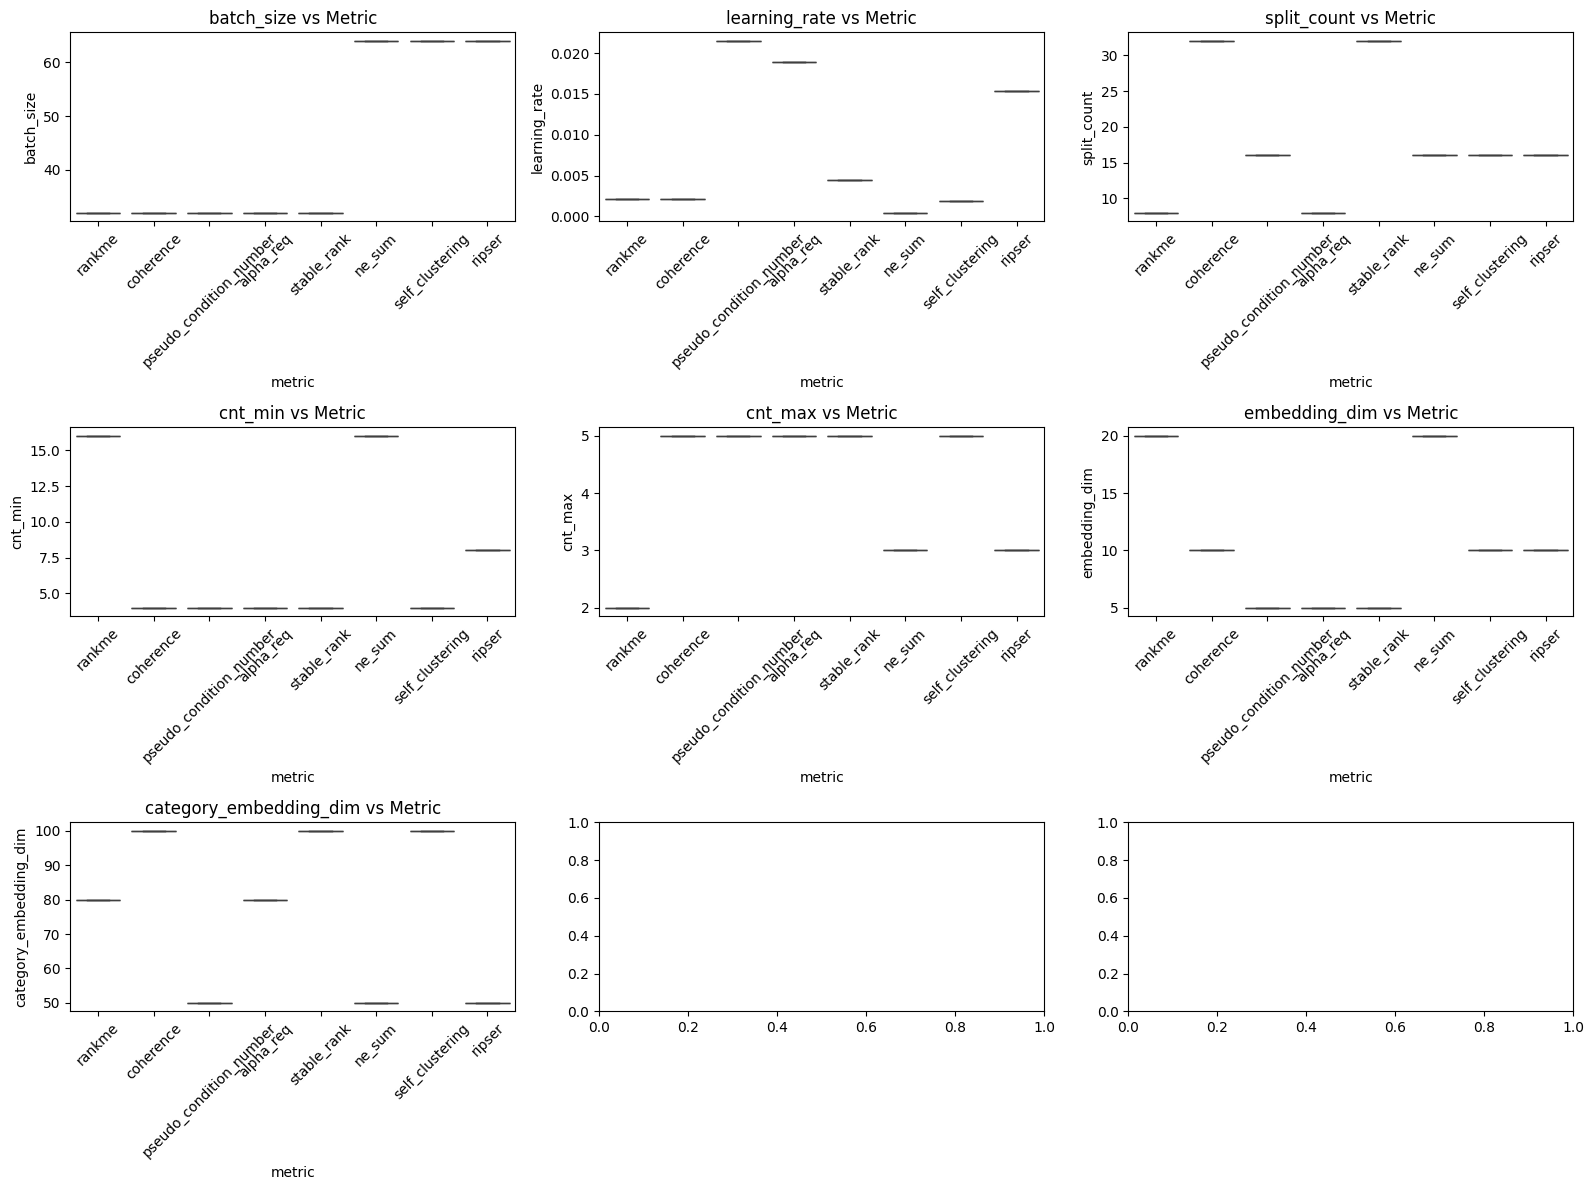

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
p = ['batch_size', 'learning_rate', 'split_count', 'cnt_min', 'cnt_max',
          'embedding_dim', 'category_embedding_dim']

for i, param in enumerate(p):
    sns.boxplot(data=params, x="metric", y=param, ax=axes[i])
    axes[i].set_title(f"{param} vs Metric")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


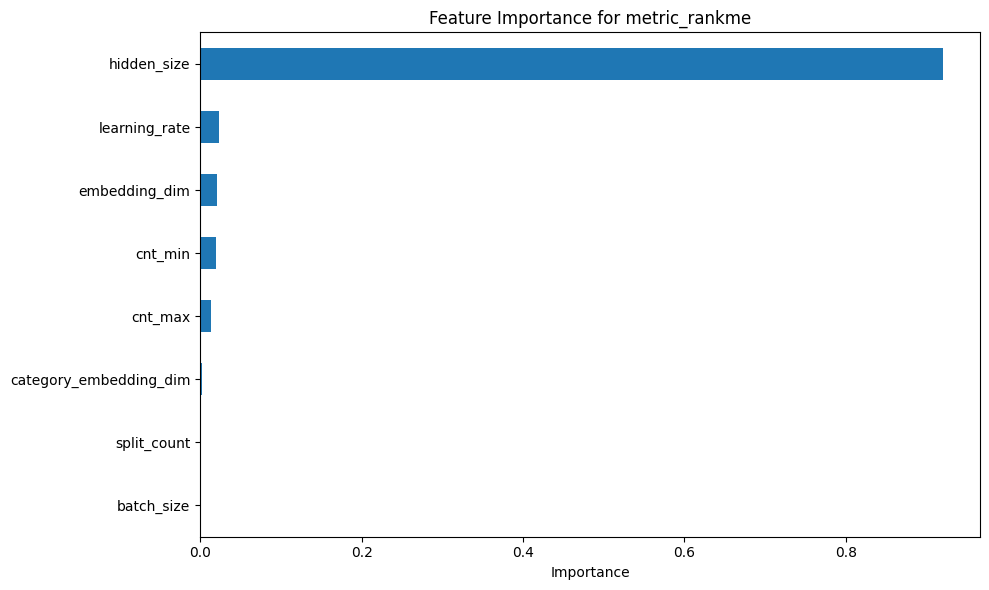

In [ ]:
from sklearn.ensemble import RandomForestRegressor

metric = "metric_rankme"
features = ['batch_size', 'learning_rate', 'split_count', 'cnt_min', 'cnt_max',
            'embedding_dim', 'category_embedding_dim', 'hidden_size']
prepocessed = results[results["metric_name"] == metric.split("metric_")[1]]

rf = RandomForestRegressor()
rf.fit(prepocessed[features], prepocessed[metric])

importances = pd.Series(rf.feature_importances_, index=features)
importances.sort_values().plot(kind="barh", figsize=(10, 6), title=f"Feature Importance for {metric}")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Здесь снова очень хорошо видно, что hidden size очень сильно влияет на метрику RankMe

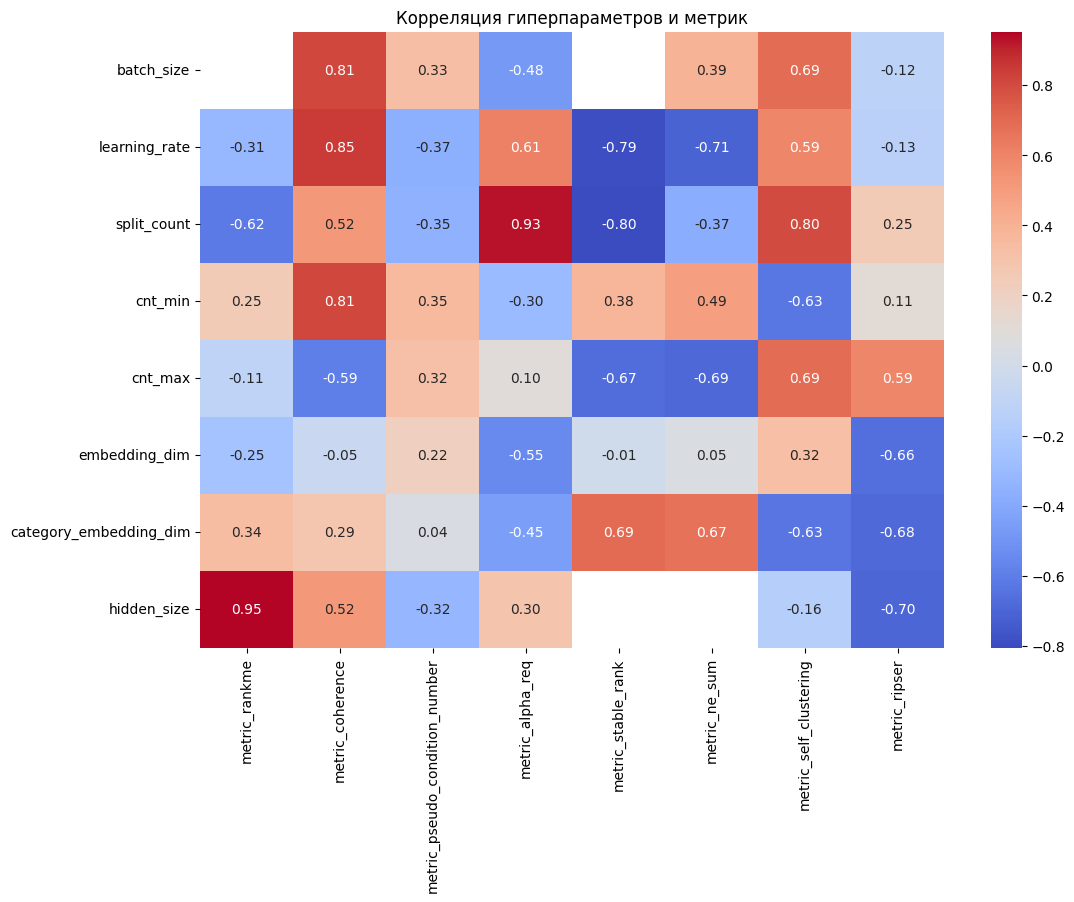

In [ ]:
metrics = [col for col in results.columns if (col.startswith("metric_") and col != "metric_name")]
p = ['batch_size', 'learning_rate', 'split_count', 'cnt_min', 'cnt_max',
          'embedding_dim', 'category_embedding_dim', 'hidden_size']

cor_matrix = results[metrics + p].corr().loc[p, metrics]

plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция гиперпараметров и метрик")
plt.show()

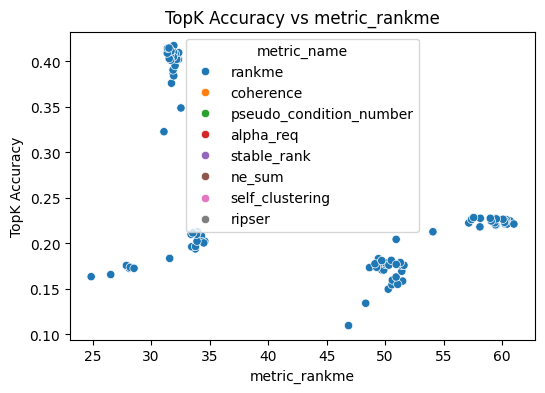

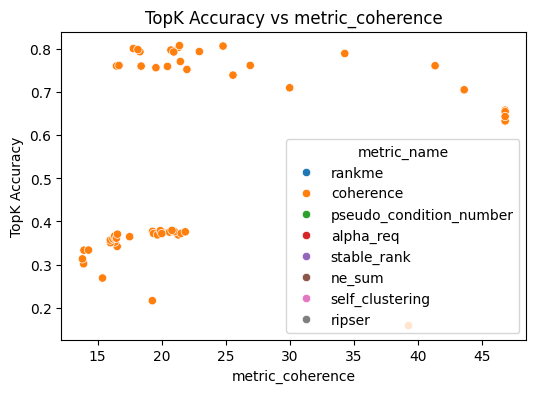

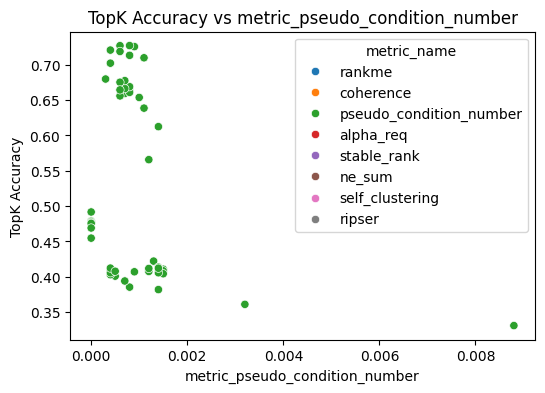

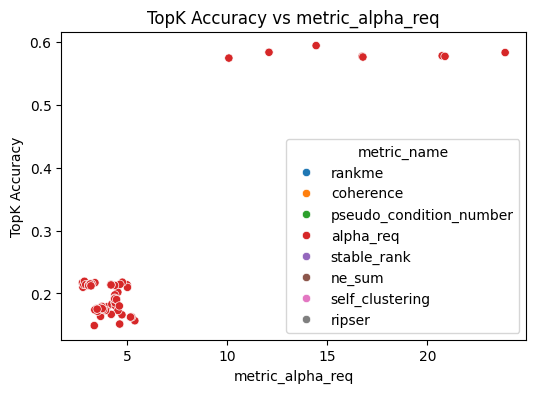

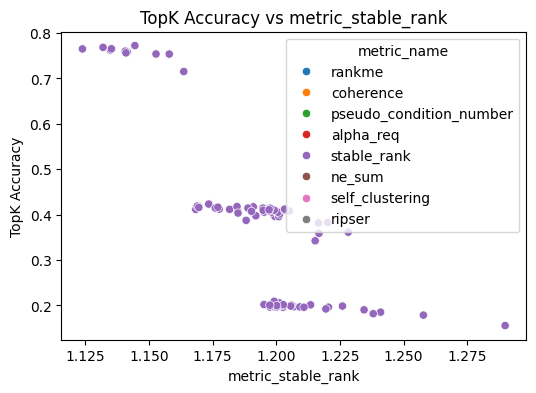

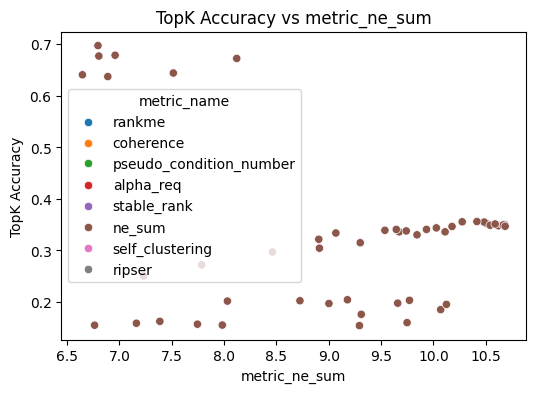

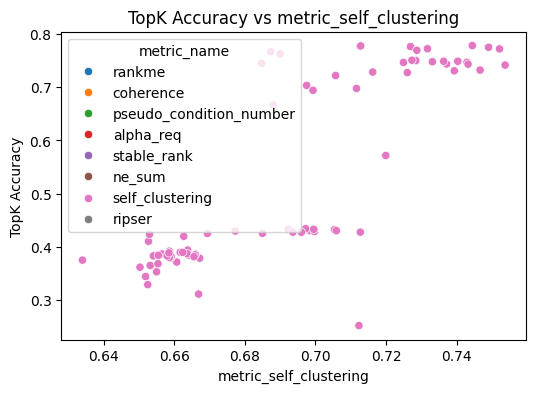

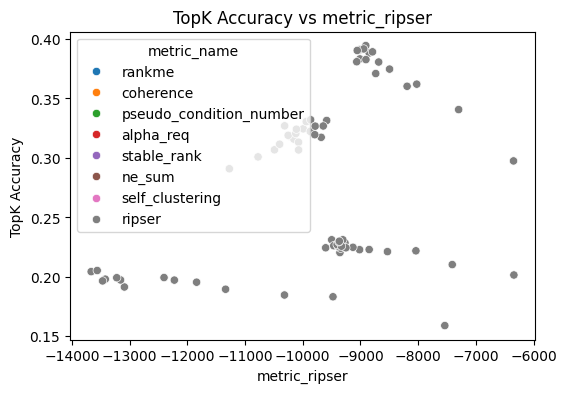

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in [col for col in results.columns if (col.startswith("metric_") and col != "metric_name")]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=results, x=metric, y="topk_accuracy", hue="metric_name")
    plt.title(f"TopK Accuracy vs {metric}")
    plt.xlabel(metric)
    plt.ylabel("TopK Accuracy")
    plt.show()


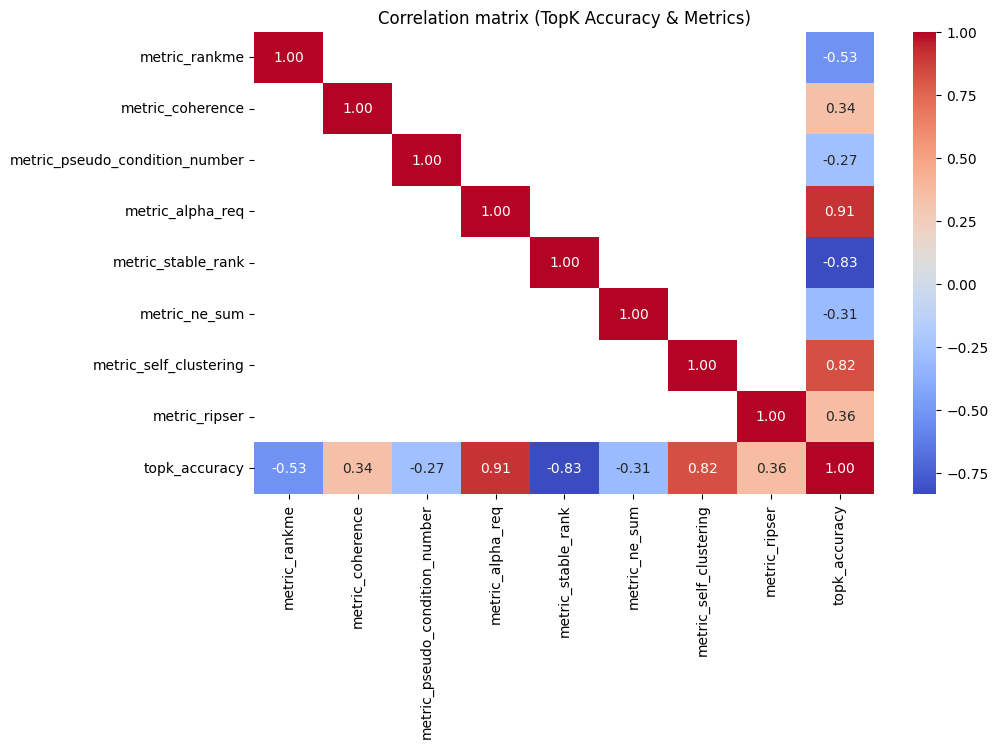

In [ ]:
correlation_cols = [col for col in results.columns if (col.startswith("metric_") and col != "metric_name")] + ["topk_accuracy"]
corr_matrix = results[correlation_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (TopK Accuracy & Metrics)")
plt.show()
